In [1]:
!pip install textblob
!pip install wordcloud

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananyatadepalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ananyatadepalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('Bitcoin_tweets_dataset_2.csv')

In [5]:
df.head()

,user_location,user_description,date,text,hashtags,source,is_retweet
0,Sunshine State,Culinarian | Hot Sauce Artisan | Kombucha Brew...,3/5/23 23:59,Which #bitcoin books should I think about read...,['bitcoin'],Twitter for iPhone,False
1,NaN,Truth-seeking pleb 📚 • Science 🧪 • Nature 🌱☀️ ...,3/5/23 23:59,"@ThankGodForBTC I appreciate the message, but ...",['Bitcoin'],Twitter for iPhone,False
2,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,3/5/23 23:59,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
3,"Paris, France",https://t.co/8M3rgdjwEe\n\n#bitcoin #blockchai...,3/5/23 23:59,CoinDashboard v3.0 is here\nAvailable on ios a...,['Bitcoin'],Twitter for Android,False
4,London,"The flower language of jasmine is loyalty, res...",3/5/23 23:59,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['Bitcoin', 'BTC']",Twitter Web App,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169761 entries, 0 to 169760
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_location     82645 non-null   object
 1   user_description  155331 non-null  object
 2   date              169761 non-null  object
 3   text              165226 non-null  object
 4   hashtags          164433 non-null  object
 5   source            164433 non-null  object
 6   is_retweet        164379 non-null  object
dtypes: object(7)
memory usage: 9.1+ MB


In [7]:
df.isnull().sum()

user_location       87116
user_description    14430
date                    0
text                 4535
hashtags             5328
source               5328
is_retweet           5382
dtype: int64

In [8]:
df.columns

Index(['user_location', 'user_description', 'date', 'text', 'hashtags',
       'source', 'is_retweet'],
      dtype='object')

In [9]:
text_df = df.drop(['user_location', 'user_description', 'hashtags',
       'source', 'is_retweet'], axis=1)
text_df.head()

,date,text
0,3/5/23 23:59,Which #bitcoin books should I think about read...
1,3/5/23 23:59,"@ThankGodForBTC I appreciate the message, but ..."
2,3/5/23 23:59,#Ethereum price update: \n\n#ETH $1664.02 USD\...
3,3/5/23 23:59,CoinDashboard v3.0 is here\nAvailable on ios a...
4,3/5/23 23:59,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...


In [10]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Which #bitcoin books should I think about reading next? https://t.co/32gas26rKB 

@ThankGodForBTC I appreciate the message, but not a fan of the religious references. Religion has nothing to do with #Bitcoin. 

#Ethereum price update: 

#ETH $1664.02 USD
#Bitcoin 0.070428 #BTC

Follow for recent ETH price updates
#altcoin, #cryptocurrency, #crypto 

CoinDashboard v3.0 is here
Available on ios and Android
#Bitcoin https://t.co/tMCQllv9rj 

#Bitcoin Short Term Fractal (4H)💥

In lower timeframe, #BTC price action seems to be repeating itself while LMACD is reproducing the same sequence. 🫡 https://t.co/2MG9yL7SDa 



In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169761 entries, 0 to 169760
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    169761 non-null  object
 1   text    165226 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [12]:
def data_processing(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text_tokens = word_tokenize(text)
        filtered_text = [w for w in text_tokens if not w in stop_words]
        return " ".join(filtered_text)
    else:
        return ""

In [13]:
text_df['text'] = text_df['text'].apply(data_processing)

In [14]:
text_df = text_df.drop_duplicates('text')

In [15]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [17]:
df_sorted = df.sort_values('date', ascending=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
df_truncated = df.iloc[:169762]
# Drop rows with NaN values in the 'date' column
df = df.dropna(subset=['date'])

In [18]:
text_df.head()

,date,text
0,3/5/23 23:59,bitcoin books think reading next
1,3/5/23 23:59,thankgodforbtc appreciate message fan religiou...
2,3/5/23 23:59,ethereum price update eth 166402 usd bitcoin 0...
3,3/5/23 23:59,coindashboard v30 available ios android bitcoin
4,3/5/23 23:59,bitcoin short term fractal 4h lower timeframe ...


In [19]:
text_df.tail(10)

,date,text
169750,2/25/23 20:49,ethereum price update eth 166932 usd bitcoin 0...
169751,2/25/23 20:49,bitcoin brewing
169752,2/25/23 20:49,ethereum text analysis mentioned hashtags twee...
169753,2/25/23 20:49,bitcoin pumps dumps american markets open day
169754,2/25/23 20:49,spirit smoothawley lives donald trump sad got ...
169756,2/25/23 20:49,btc community wants elon musk integrate bitcoi...
169757,2/25/23 20:49,pump stx 0889 15 seconds current price 10217 f...
169758,2/25/23 20:49,kaspa kaspa community leading way new ath yest...
169759,2/25/23 20:49,ether supply impact shanghai upgrade limited b...
169760,2/25/23 20:49,pump stx 2262 60 seconds current price 10128 f...


In [20]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

bitcoin books think reading next 

thankgodforbtc appreciate message fan religious references religion nothing bitcoin 

ethereum price update eth 166402 usd bitcoin 0070428 btc follow recent eth price updates altcoin cryptocurrency crypto 

coindashboard v30 available ios android bitcoin 

bitcoin short term fractal 4h lower timeframe btc price action seems repeating lmacd reproducing sequence 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146612 entries, 0 to 169760
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    146612 non-null  object
 1   text    146612 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [24]:
text_df.head(10)

,date,text,polarity
0,3/5/23 23:59,bitcoin books think reading next,0.0000
1,3/5/23 23:59,thankgodforbtc appreciate message fan religiou...,0.0000
2,3/5/23 23:59,ethereum price update eth 166402 usd bitcoin 0...,0.0000
3,3/5/23 23:59,coindashboard v30 available ios android bitcoin,0.4000
4,3/5/23 23:59,bitcoin short term fractal 4h lower timeframe ...,0.0500
5,3/5/23 23:59,yall message account recovery hacking cyber se...,0.0000
6,3/5/23 23:59,pump 4hour chart 1x normal coin filusdt entry ...,0.1500
7,3/5/23 23:59,twelvefold yugalabs unveils unique bitcoin col...,0.1375
8,3/5/23 23:59,bitcoinbullsnft first nft bitcoin,0.2500
9,3/5/23 23:59,first bitcoin halving age humble time,0.0250


In [25]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head()

,date,text,polarity,sentiment
0,3/5/23 23:59,bitcoin books think reading next,0.00,Neutral
1,3/5/23 23:59,thankgodforbtc appreciate message fan religiou...,0.00,Neutral
2,3/5/23 23:59,ethereum price update eth 166402 usd bitcoin 0...,0.00,Neutral
3,3/5/23 23:59,coindashboard v30 available ios android bitcoin,0.40,Positive
4,3/5/23 23:59,bitcoin short term fractal 4h lower timeframe ...,0.05,Positive


In [28]:
text_df.tail()

,date,text,polarity,sentiment
169756,2/25/23 20:49,btc community wants elon musk integrate bitcoi...,0.200000,Positive
169757,2/25/23 20:49,pump stx 0889 15 seconds current price 10217 f...,0.000000,Neutral
169758,2/25/23 20:49,kaspa kaspa community leading way new ath yest...,0.218182,Positive
169759,2/25/23 20:49,ether supply impact shanghai upgrade limited b...,-0.071429,Negative
169760,2/25/23 20:49,pump stx 2262 60 seconds current price 10128 f...,0.000000,Neutral


In [29]:

text_df['date'] = pd.to_datetime(text_df['date']) 
daily_average = text_df.groupby(text_df['date'].dt.date)['polarity'].mean()
daily_df = pd.DataFrame({'date': daily_average.index, 'average_polarity': daily_average.values})


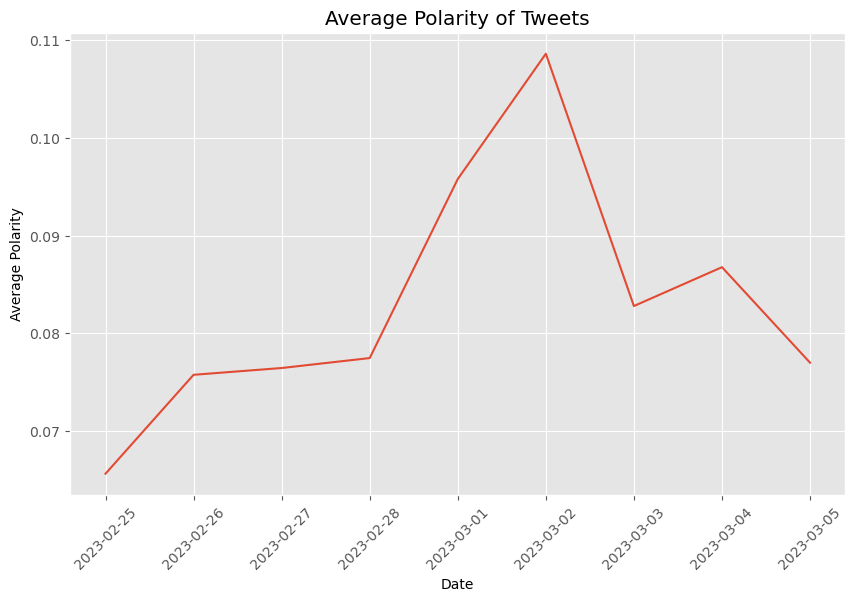

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(daily_df['date'], daily_df['average_polarity'])
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.title('Average Polarity of Tweets')
plt.xticks(rotation=45)
plt.show()

In [31]:
df_bitcoin = pd.read_csv("BTC-USD.csv")
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565
1,2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842
2,2023-02-27,23561.451172,23857.890625,23205.878906,23522.871094,23522.871094,22660763494
3,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
4,2023-03-01,23150.929688,23880.632813,23088.626953,23646.550781,23646.550781,24662841200


In [32]:
df_bitcoin.columns
text_df_bitcoin = df_bitcoin.drop(['Open', 'Close', 'Adj Close', 'Volume'], axis=1)
text_df_bitcoin.head()

,Date,High,Low
0,2023-02-25,23210.210938,22861.558594
1,2023-02-26,23654.367188,23084.220703
2,2023-02-27,23857.890625,23205.878906
3,2023-02-28,23585.384766,23077.650391
4,2023-03-01,23880.632813,23088.626953


In [33]:
# Calculate the average price
df_bitcoin['Average Price'] = (df_bitcoin['High'] + df_bitcoin['Low']) / 2

# Convert the 'date' column to datetime format
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

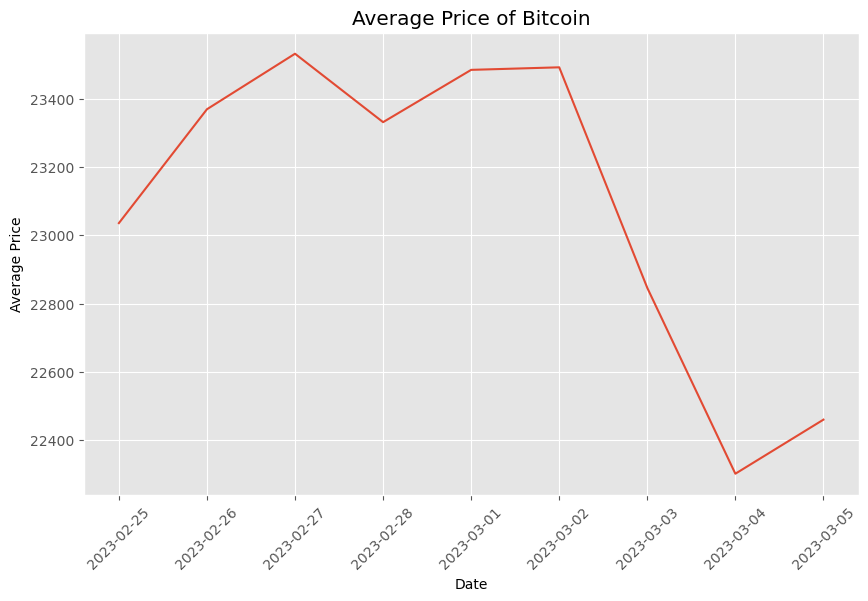

In [34]:
# Plot the average price against the date
plt.figure(figsize=(10, 6))
plt.plot(df_bitcoin['Date'], df_bitcoin['Average Price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Bitcoin')
plt.xticks(rotation=45)
plt.show()

In [35]:
if len(df['date']) == len(daily_average):
    # Proceed with plotting
    plt.plot(df['date'], daily_average, label='Average Polarity')
    # Rest of the plotting code
else:
    print("Error: The number of x-values and y-values does not match.")

Error: The number of x-values and y-values does not match.


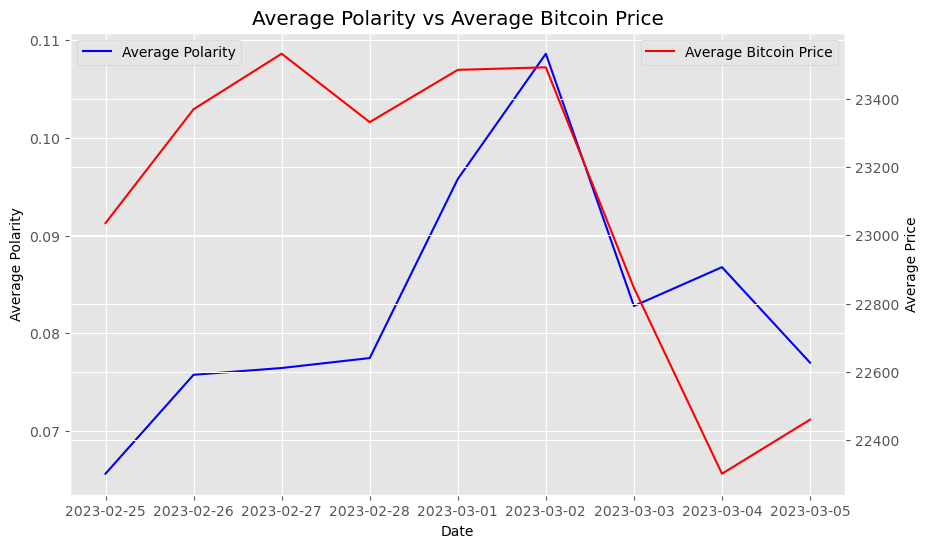

In [36]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average polarity values on the left y-axis
ax1.plot(df_bitcoin['Date'], daily_average, color='blue', label='Average Polarity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Polarity')

# Create a twin axis object sharing the x-axis with ax1
ax2 = ax1.twinx()

# Plot average Bitcoin price on the right y-axis
ax2.plot(df_bitcoin['Date'], df_bitcoin['Average Price'], color='red', label='Average Bitcoin Price')
ax2.set_ylabel('Average Price')

# Set title and legends
ax1.set_title('Average Polarity vs Average Bitcoin Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [37]:
df_year = pd.read_csv('Bitcoin_tweets.csv')

/var/folders/hv/0m85t71952z5ynp_1s71lvfh0000gn/T/ipykernel_27036/3425199902.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv('Bitcoin_tweets.csv')


In [38]:
df_year.isnull().sum()
df_year.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [39]:
df_years = df_year.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'hashtags', 'source', 'is_retweet'], axis=1)

df_years.head()

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [40]:
def data_processing(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text_tokens = word_tokenize(text)
        filtered_text = [w for w in text_tokens if not w in stop_words]
        return " ".join(filtered_text)
    else:
        return np.nan

In [41]:
df_years['text'] = df_years['text'].apply(data_processing)

In [42]:
df_years = df_years.drop_duplicates('text')

In [43]:
df_years['text'] = df_years['text'].apply(lambda x: stemming(x) if isinstance(x, str) else x)

In [44]:
df_years.head()

,date,text
0,2021-02-10 23:59:04,blue ridge bank shares halted nyse bitcoin atm...
1,2021-02-10 23:58:48,today thats thursday take 2 friend leowandersl...
2,2021-02-10 23:54:48,guys evening read article btc would like share
3,2021-02-10 23:54:33,btc big chance billion price 48726440 20210211...
4,2021-02-10 23:54:06,network secured 9 508 nodes today soon biggest...


In [45]:
def polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0  # or any other default value you want to assign


In [46]:
df_years['polarity'] = df_years['text'].apply(polarity)

In [47]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [48]:
df_years['sentiment'] = df_years['polarity'].apply(sentiment)

In [49]:
df_years.head()

,date,text,polarity,sentiment
0,2021-02-10 23:59:04,blue ridge bank shares halted nyse bitcoin atm...,0.00,Neutral
1,2021-02-10 23:58:48,today thats thursday take 2 friend leowandersl...,0.00,Neutral
2,2021-02-10 23:54:48,guys evening read article btc would like share,0.00,Neutral
3,2021-02-10 23:54:33,btc big chance billion price 48726440 20210211...,0.00,Neutral
4,2021-02-10 23:54:06,network secured 9 508 nodes today soon biggest...,-0.25,Negative


In [50]:
df_years.tail()

,date,text,polarity,sentiment
95762463,2023-01-06 17:46:35,bitcoin squeeze super tight way break bullish ...,0.077381,Positive
95762464,2023-01-06 17:46:29,closed btc short 16725 missed long place hair ...,-0.050000,Negative
95762465,2023-01-06 17:46:22,ethereum price update eth 126359 usd bitcoin 0...,0.000000,Neutral
95762466,2023-01-06 17:46:20,1 168147 007 details change 1205 24h low 16710...,0.080000,Positive
95762467,2023-01-06 17:46:17,earn crypto playing fun games online get rewar...,0.300000,Positive


In [51]:
print(df_years.columns)

Index(['date', 'text', 'polarity', 'sentiment'], dtype='object')


In [52]:
unknown_rows = df_years[df_years['date'].astype(str).str.contains('ETH|BTC|Bitcoin', na=False)]
df_years = df_years.drop(unknown_rows.index)
df_years['date'] = pd.to_datetime(df_years['date'], errors='coerce')
df_years.set_index('date', inplace=True)

weekly_average_polarity = df_years['polarity'].resample('W').mean()

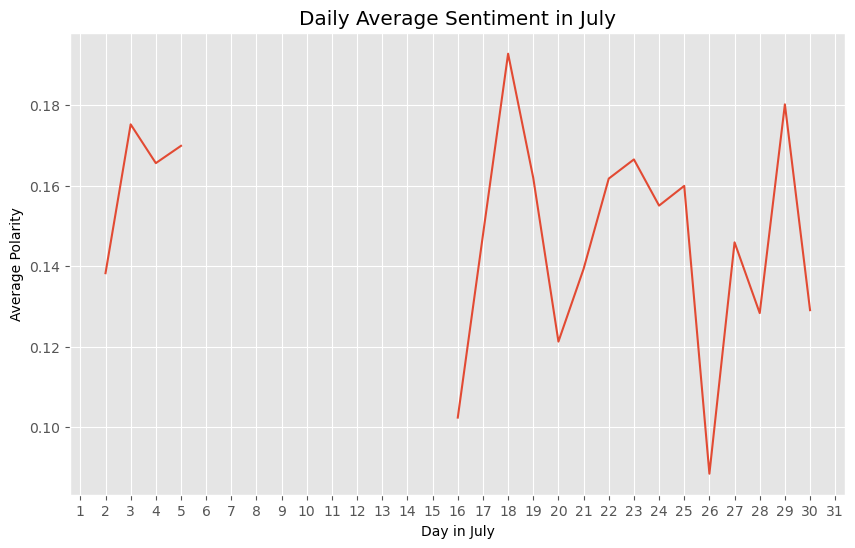

In [53]:
# Subset the DataFrame for the desired date range in July
start_date = pd.to_datetime('2021-07-01')
end_date = pd.to_datetime('2021-07-31')
july_subset = df_years.loc[(df_years.index >= start_date) & (df_years.index <= end_date)]

# Calculate the daily average sentiment in July
daily_average_polarity = july_subset['polarity'].resample('D').mean()

# Plot the daily average sentiment against the day in July
plt.figure(figsize=(10, 6))
plt.plot(daily_average_polarity.index.day, daily_average_polarity)
plt.xlabel('Day in July')
plt.ylabel('Average Polarity')
plt.title('Daily Average Sentiment in July')
plt.xticks(range(1, 32))
plt.show()

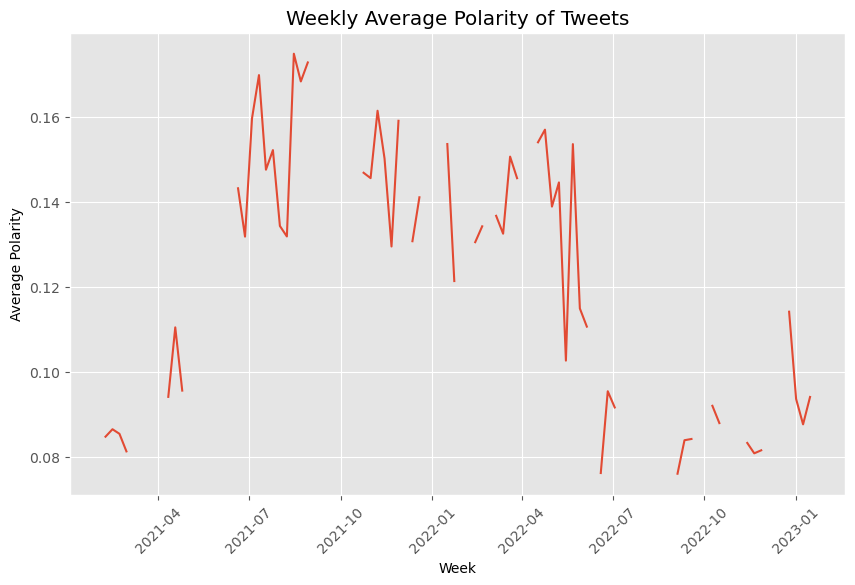

In [54]:
# Resample the data to daily frequency
daily_average_polarity = df_years['polarity'].resample('D').mean()

# Resample the daily average polarity to weekly frequency
weekly_average_polarity = daily_average_polarity.resample('W').mean()

# Plot the weekly average polarity
plt.figure(figsize=(10, 6))
plt.plot(weekly_average_polarity.index, weekly_average_polarity)
plt.xlabel('Week')
plt.ylabel('Average Polarity')
plt.title('Weekly Average Polarity of Tweets')
plt.xticks(rotation=45)
plt.show()

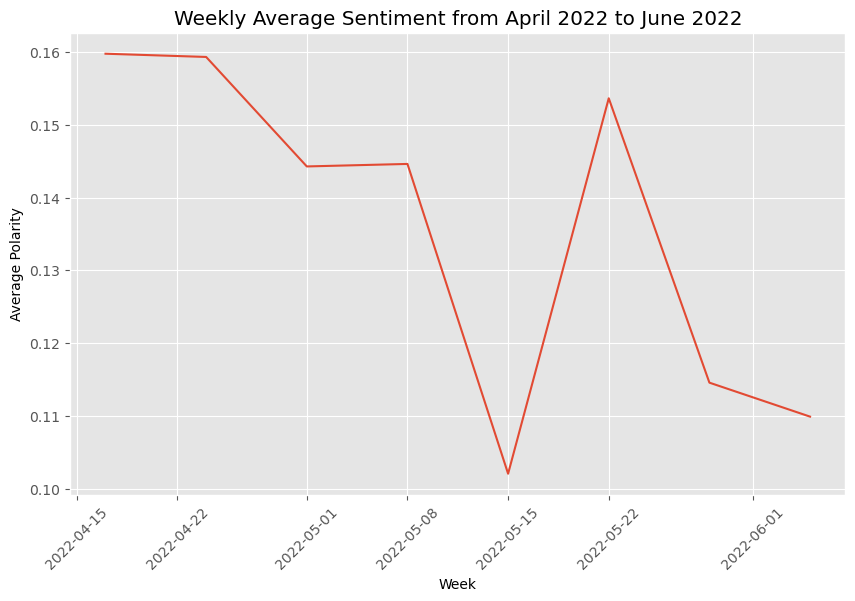

In [55]:
# Subset the DataFrame for the desired date range
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-06-05')
subset_df = df_years.loc[(df_years.index >= start_date) & (df_years.index <= end_date)]

# Calculate the weekly average sentiment
weekly_average_polarity = subset_df['polarity'].resample('W').mean()

# Create a new DataFrame with the week as the index
weekly_df = pd.DataFrame({'Week': weekly_average_polarity.index, 'Average Polarity': weekly_average_polarity.values})
weekly_df.set_index('Week', inplace=True)

# Plot the weekly average sentiment against the week
plt.figure(figsize=(10, 6))
plt.plot(weekly_df.index, weekly_df['Average Polarity'])
plt.xlabel('Week')
plt.ylabel('Average Polarity')
plt.title('Weekly Average Sentiment from April 2022 to June 2022')
plt.xticks(rotation=45)
plt.show()


In [56]:
df_bitcoin_april = pd.read_csv("BTC-USD-April.csv")
df_bitcoin_april.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01,43194.503906,44793.601563,42952.585938,44354.636719,44354.636719,32479047645
1,2022-03-02,44357.617188,45077.578125,43432.851563,43924.117188,43924.117188,29183112630
2,2022-03-03,43925.195313,44021.578125,41914.750000,42451.789063,42451.789063,24967782593
3,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427
4,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450


In [57]:
df_bitcoin_april.columns
text_df_bitcoin_april = df_bitcoin_april.drop(['Open', 'Adj Close', 'Volume'], axis=1)
text_df_bitcoin_april.head()
text_df_bitcoin_april.columns

Index(['Date', 'High', 'Low', 'Close'], dtype='object')

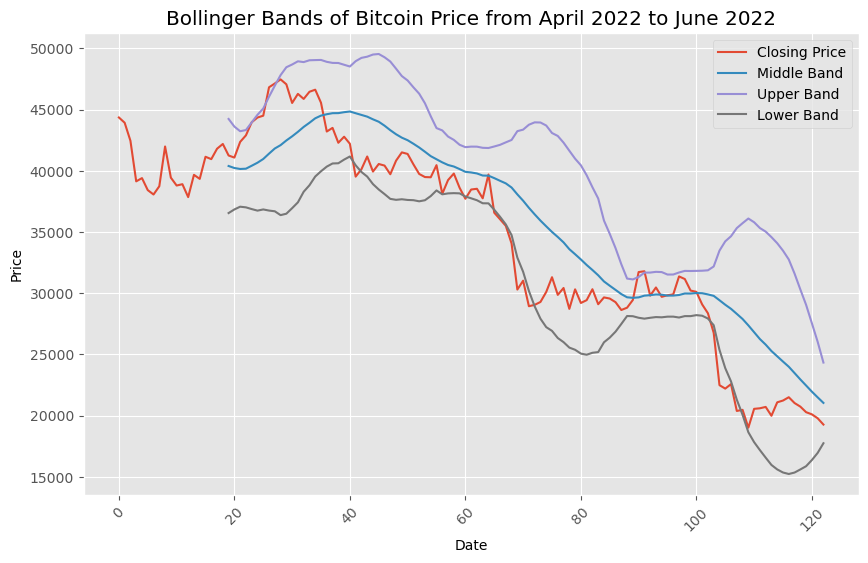

In [58]:
# Compute the middle band (20-day simple moving average)
middle_band = text_df_bitcoin_april['Close'].rolling(window=20).mean()

# Calculate the standard deviation
standard_deviation = text_df_bitcoin_april['Close'].rolling(window=20).std()

# Calculate the upper and lower bands
upper_band = middle_band + (2 * standard_deviation)
lower_band = middle_band - (2 * standard_deviation)

# Plotting Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(text_df_bitcoin_april.index, text_df_bitcoin_april['Close'], label='Closing Price')
plt.plot(text_df_bitcoin_april.index, middle_band, label='Middle Band')
plt.plot(text_df_bitcoin_april.index, upper_band, label='Upper Band')
plt.plot(text_df_bitcoin_april.index, lower_band, label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands of Bitcoin Price from April 2022 to June 2022')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [59]:
text_df_bitcoin_april.columns

Index(['Date', 'High', 'Low', 'Close'], dtype='object')

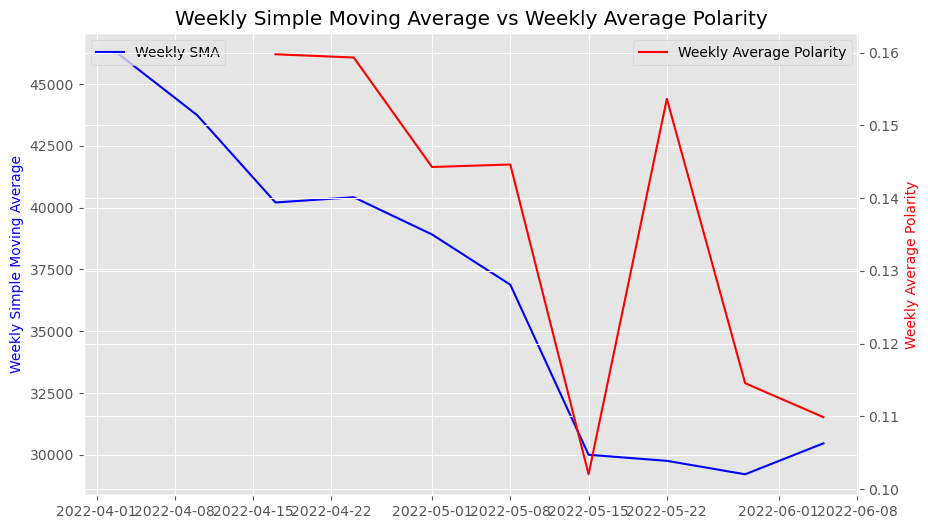

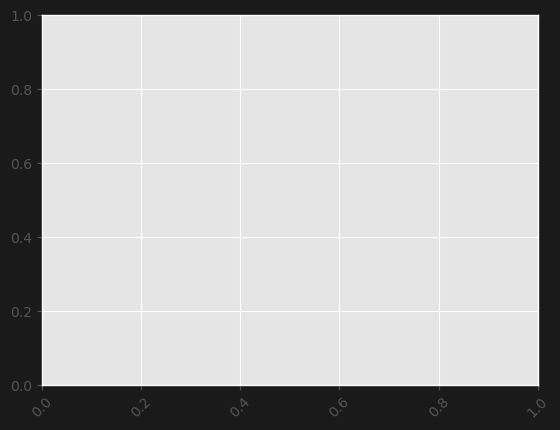

In [60]:
# Set the index to a datetime index
text_df_bitcoin_april['Date'] = pd.to_datetime(text_df_bitcoin_april['Date'])
text_df_bitcoin_april.set_index('Date', inplace=True)

# Create a new DataFrame containing dates between April and June
start_date = '2022-04-01'
end_date = '2022-06-05'
df_april_june = text_df_bitcoin_april[(text_df_bitcoin_april.index >= start_date) & (text_df_bitcoin_april.index <= end_date)]

# Calculate the weekly simple moving averages of the closing price
weekly_sma = df_april_june['Close'].resample('W').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot weekly simple moving averages on the first y-axis
ax1.plot(weekly_sma.index, weekly_sma, color='blue', label='Weekly SMA')
ax1.set_ylabel('Weekly Simple Moving Average', color='blue')

# Add a second y-axis for weekly average polarities
ax2 = ax1.twinx()
ax2.plot(weekly_average_polarity.index, weekly_average_polarity, color='red', label='Weekly Average Polarity')
ax2.set_ylabel('Weekly Average Polarity', color='red')

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Weekly Simple Moving Average vs Weekly Average Polarity')
fig = plt.figure(facecolor='#1A1A1A')

# Display legends and rotate x-axis labels for better readability
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)

# Display the plot
plt.show()

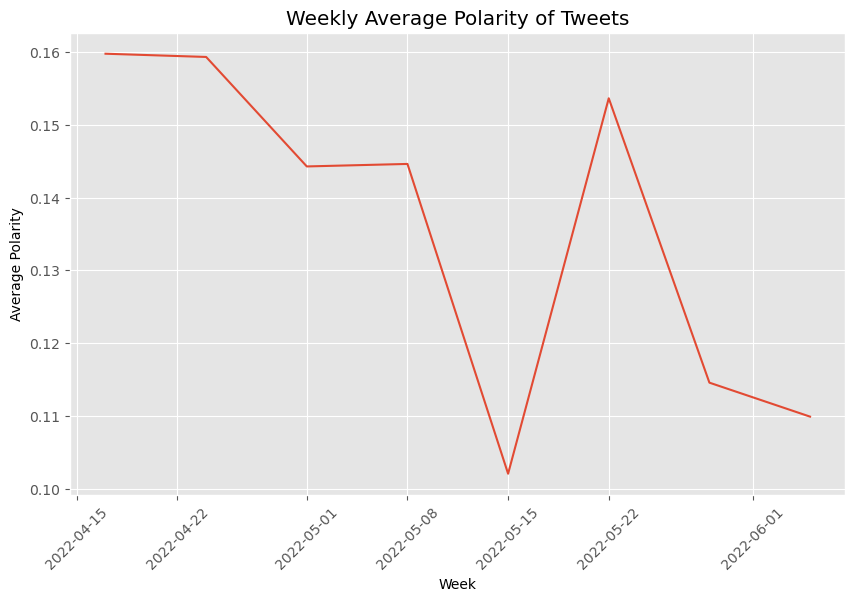

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_average_polarity.index, weekly_average_polarity)
plt.xlabel('Week')
plt.ylabel('Average Polarity')
plt.title('Weekly Average Polarity of Tweets')
plt.xticks(rotation=45)
plt.show()

In [62]:
df_bitcoin_year = pd.read_csv("BTC-USD-monthly.csv")
df_bitcoin_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [63]:
df_bitcoin_year.columns
text_df_bitcoin_year = df_bitcoin_year.drop(['Open', 'Adj Close', 'Volume'], axis=1)
text_df_bitcoin_year.head()
text_df_bitcoin_year.columns

Index(['Date', 'High', 'Low', 'Close'], dtype='object')

In [64]:
text_df_bitcoin_year.columns

Index(['Date', 'High', 'Low', 'Close'], dtype='object')

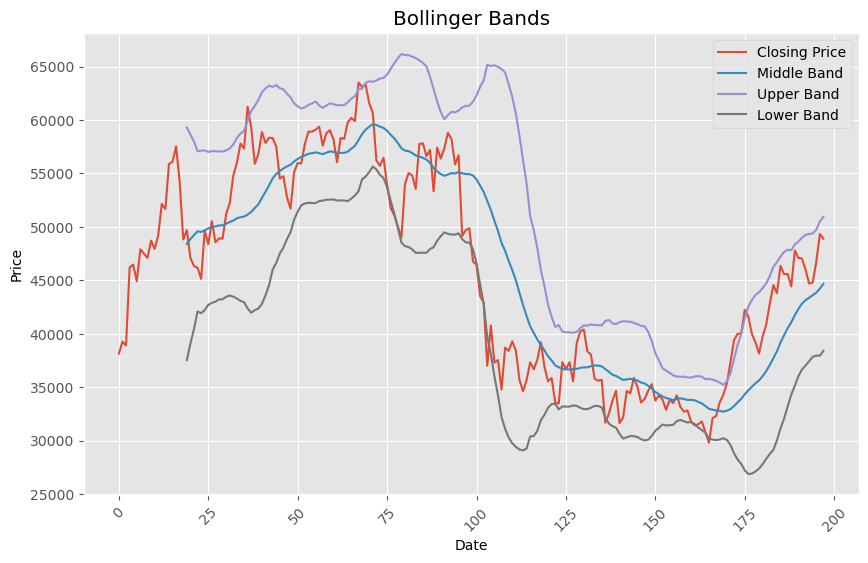

In [65]:
# Compute the middle band (20-day simple moving average)
middle_band = text_df_bitcoin_year['Close'].rolling(window=20).mean()

# Calculate the standard deviation
standard_deviation = text_df_bitcoin_year['Close'].rolling(window=20).std()

# Calculate the upper and lower bands
upper_band = middle_band + (2 * standard_deviation)
lower_band = middle_band - (2 * standard_deviation)

# Plotting Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(text_df_bitcoin_year.index, text_df_bitcoin_year['Close'], label='Closing Price')
plt.plot(text_df_bitcoin_year.index, middle_band, label='Middle Band')
plt.plot(text_df_bitcoin_year.index, upper_band, label='Upper Band')
plt.plot(text_df_bitcoin_year.index, lower_band, label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [66]:
# Convert the 'date' column to datetime format
text_df_bitcoin_year['Date'] = pd.to_datetime(text_df_bitcoin_year['Date'])

# Set 'Date' column as the index
text_df_bitcoin_year.set_index('Date', inplace=True)

# Calculate the weekly Simple Moving Average (SMA)
weekly_sma = text_df_bitcoin_year['Close'].resample('W').mean()

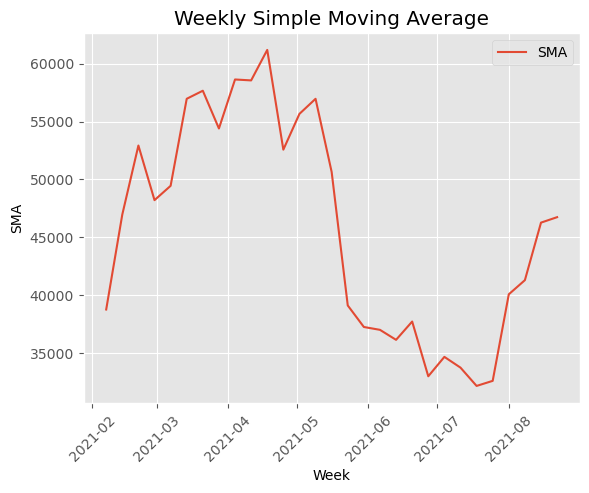

In [67]:
plt.plot(weekly_sma.index, weekly_sma, label='SMA')
plt.xlabel('Week')
plt.ylabel('SMA')
plt.title('Weekly Simple Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [68]:
text_df_bitcoin_year.columns

Index(['High', 'Low', 'Close'], dtype='object')

In [69]:
size_weekly_sma = len(weekly_average_polarity)
size_monthly_average = len(monthly_average)

print("Size of weekly_sma:", size_weekly_sma)
print("Size of monthly_average:", size_monthly_average)

NameError: name 'monthly_average' is not defined

In [70]:
df_bitcoin_year['Date'] = pd.to_datetime(df_bitcoin_year['Date'])
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

merged_df = pd.merge(df_bitcoin_year, monthly_df, left_on='Date', right_on='date', how='inner')


NameError: name 'monthly_df' is not defined

In [ ]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average polarity values on the left y-axis
ax1.plot(weekly_sma.index, weekly_average_polarity, color='blue', label='Average Polarity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Polarity')

# Create a twin axis object sharing the x-axis with ax1
ax2 = ax1.twinx()

# Plot average Bitcoin price on the right y-axis
ax2.plot(weekly_sma.index, weekly_sma, color='red', label='Average Bitcoin Price')
ax2.set_ylabel('Average Price')

# Set title and legends
ax1.set_title('Weekly Average Polarity vs Average Simple Moving Average of Bitcoin')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("#AEEFC5", "#42a4f5", "#b898eb")
fig = plt.figure(facecolor='#1A1A1A')
wp = {'linewidth':2, 'edgecolor':"black"}
tags = subset_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments', color = 'black')


In [ ]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(subset_df['text'])

In [ ]:
feature_names = vect.vocabulary_.keys()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(list(feature_names)[:20]))

In [ ]:
X = subset_df['text']
Y = subset_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()